In [111]:
from kestrix.params import *
import tensorflow as tf
from keras_cv import visualization
from kestrix.visualization import visualize_bounding_box

In [112]:
path = "../data/package_testing"

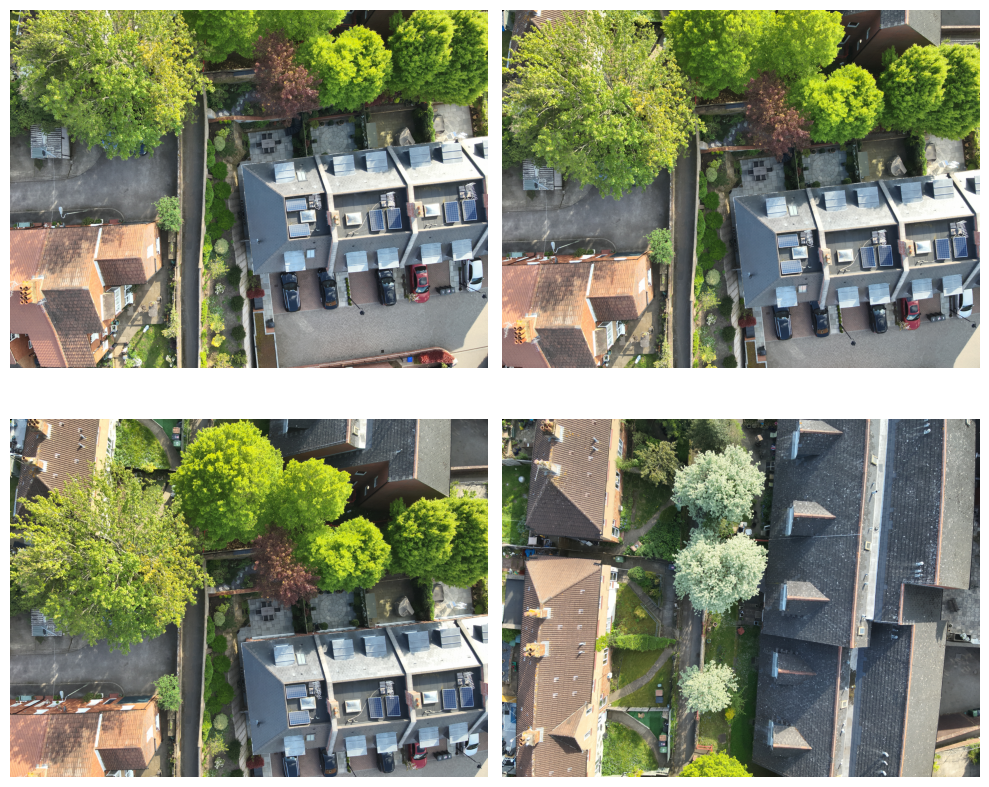

In [113]:
visualize_bounding_box(path)